# Boston house Price Prediction using MachineLearning Regression model :

###  Now import libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

### Now to import Dataset :

In [2]:
boston_house = pd.read_csv("BostonHousing.csv")

In [3]:
boston_house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston_house.shape

(506, 14)

### To check if the Dataset have any null value :

In [5]:
boston_house.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
boston_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### Observation : it seems to have no null value in the Dataset columns.

### To check correlation between the columns :

<AxesSubplot:>

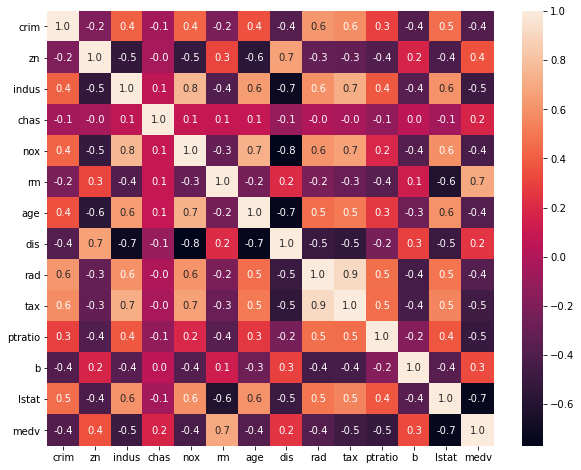

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(boston_house.corr(),annot=True,fmt=".1f")

### To check the Outliers :

In [8]:
boston_house.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

crim skewness =  5.223148798243851


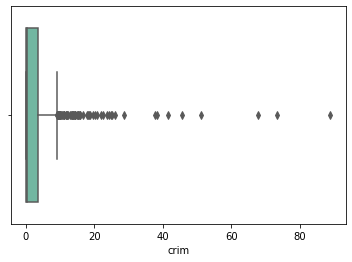

zn skewness =  2.2256663227354307


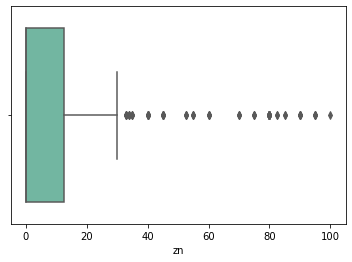

indus skewness =  0.29502156787351164


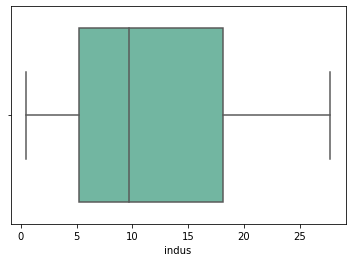

chas skewness =  3.405904172058746


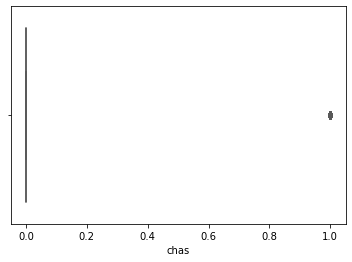

nox skewness =  0.7293079225348787


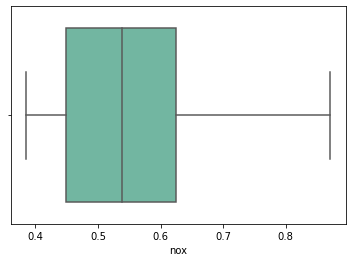

rm skewness =  0.40361213328874385


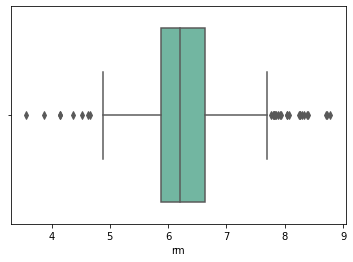

age skewness =  -0.5989626398812962


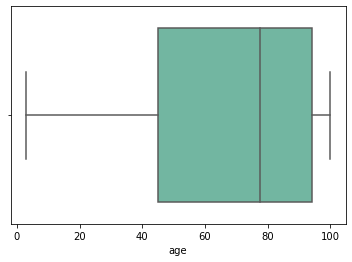

dis skewness =  1.0117805793009007


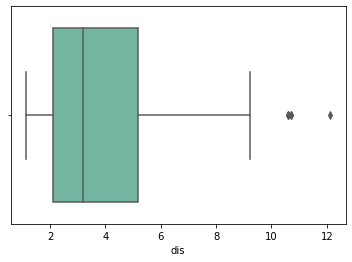

rad skewness =  1.0048146482182057


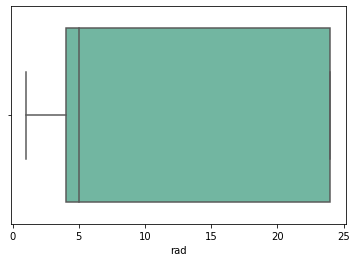

tax skewness =  0.669955941795016


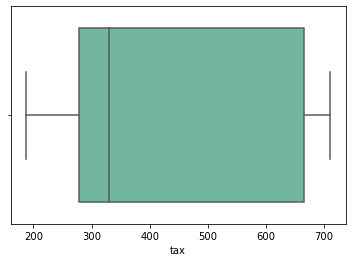

ptratio skewness =  -0.8023249268537809


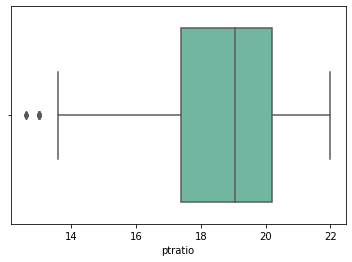

b skewness =  -2.8903737121414492


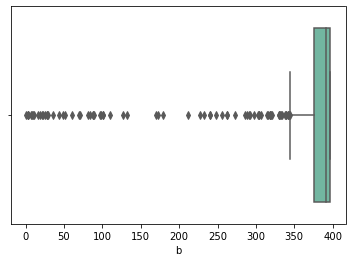

lstat skewness =  0.9064600935915367


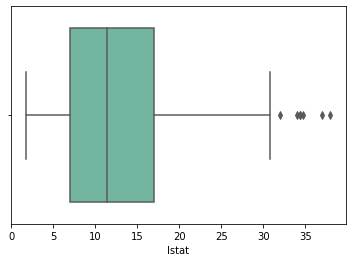

medv skewness =  1.1080984082549072


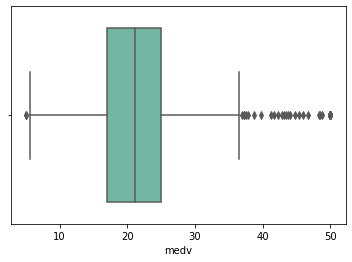

In [9]:
for cols in boston_house:
    s = boston_house[cols].skew()
    print(cols,"skewness = ",s)
    sns.boxplot(boston_house[cols],palette="Set2")
    plt.show()

In [10]:
df_2=boston_house.drop("medv",axis=1)

In [11]:
df_2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


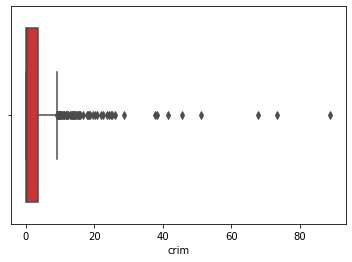

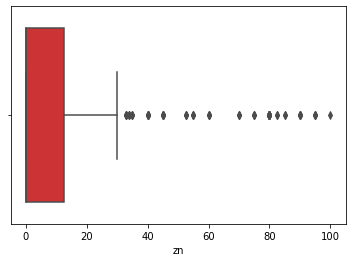

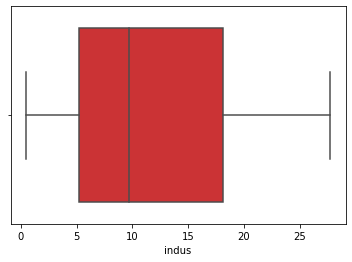

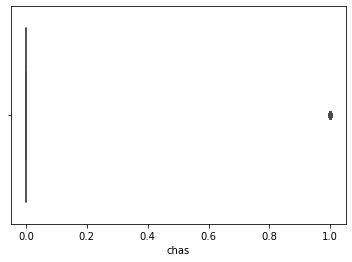

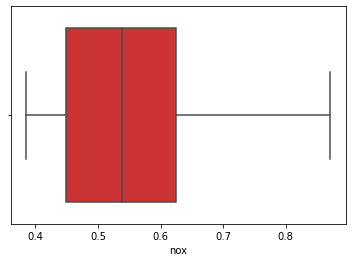

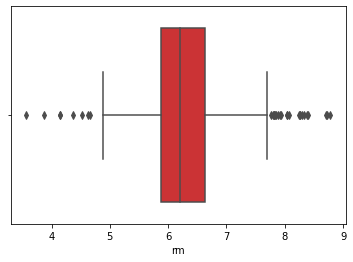

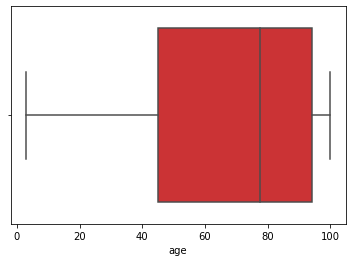

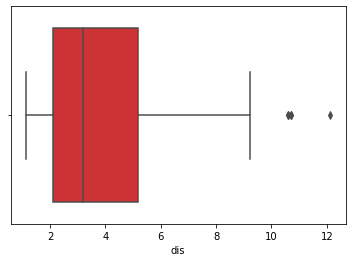

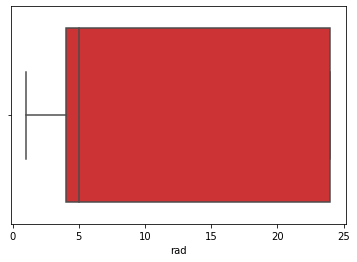

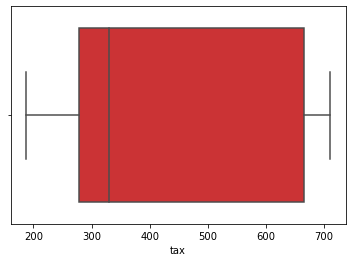

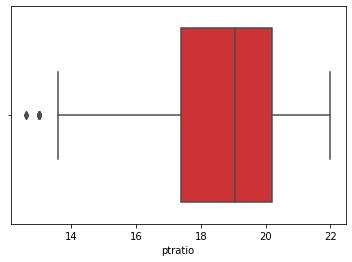

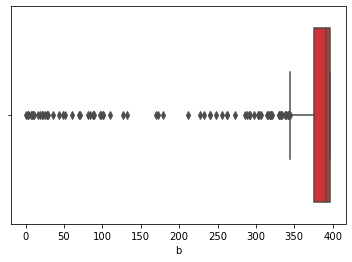

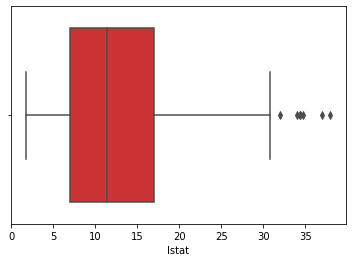

In [12]:
for cols in df_2:
    sns.boxplot(df_2[cols],palette="Set1")
    plt.show()

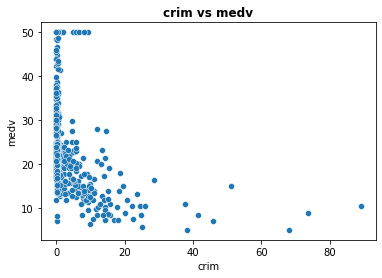

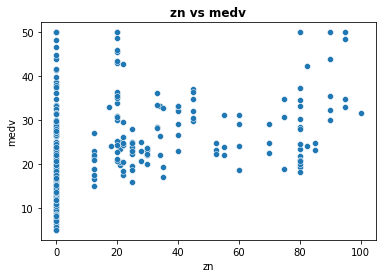

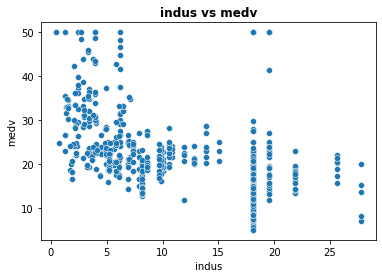

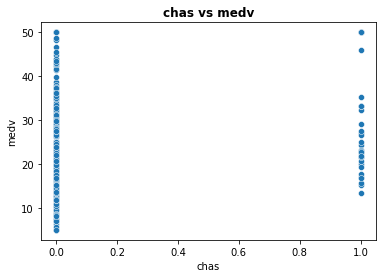

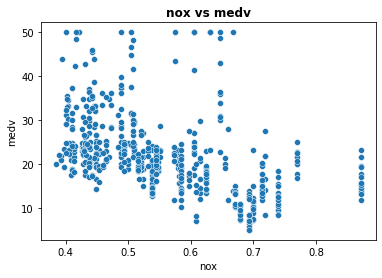

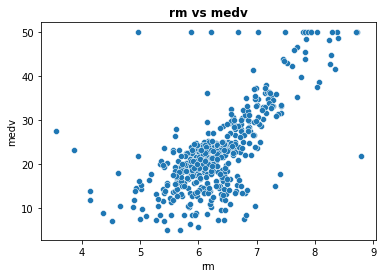

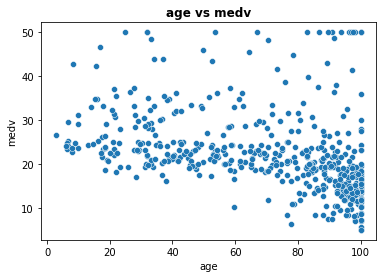

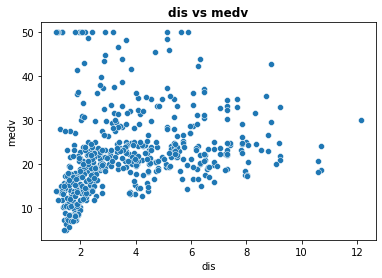

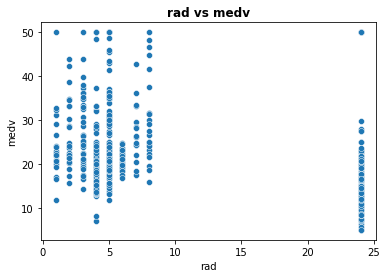

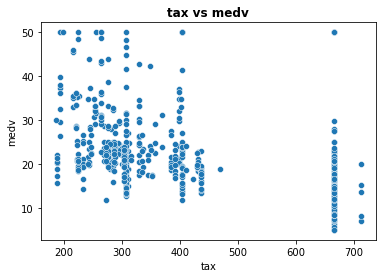

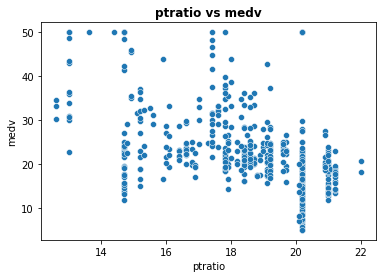

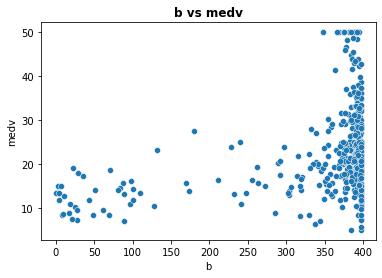

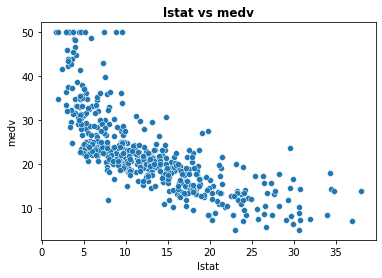

In [13]:
for cols in df_2:
    sns.scatterplot(df_2[cols],boston_house["medv"])
    plt.title(cols+" vs medv",fontweight="bold")
    plt.show()

### To check skewness of the columns :

In [14]:
for cols in df_2:
    s = df_2[cols].skew()
    print(cols,"skewness = ",s)

crim skewness =  5.223148798243851
zn skewness =  2.2256663227354307
indus skewness =  0.29502156787351164
chas skewness =  3.405904172058746
nox skewness =  0.7293079225348787
rm skewness =  0.40361213328874385
age skewness =  -0.5989626398812962
dis skewness =  1.0117805793009007
rad skewness =  1.0048146482182057
tax skewness =  0.669955941795016
ptratio skewness =  -0.8023249268537809
b skewness =  -2.8903737121414492
lstat skewness =  0.9064600935915367


crim skewness =  5.223148798243851


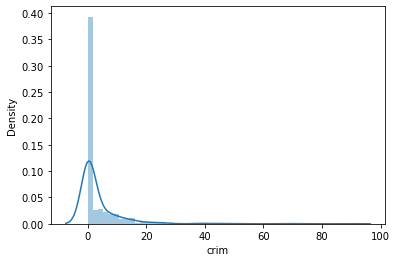

zn skewness =  2.2256663227354307


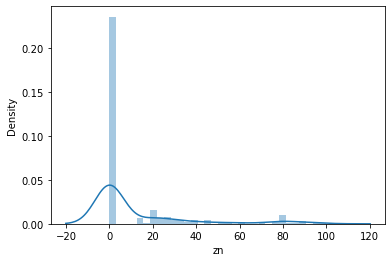

indus skewness =  0.29502156787351164


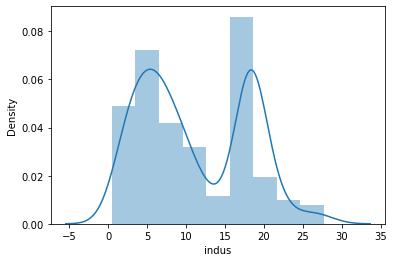

chas skewness =  3.405904172058746


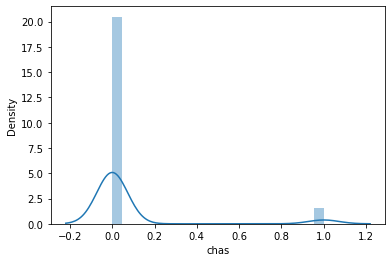

nox skewness =  0.7293079225348787


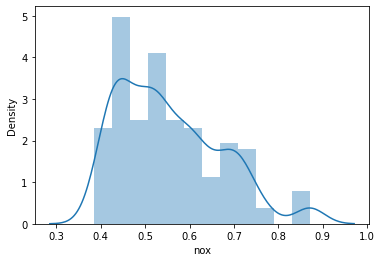

rm skewness =  0.40361213328874385


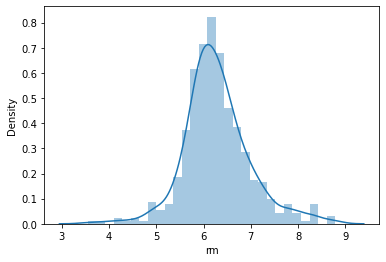

age skewness =  -0.5989626398812962


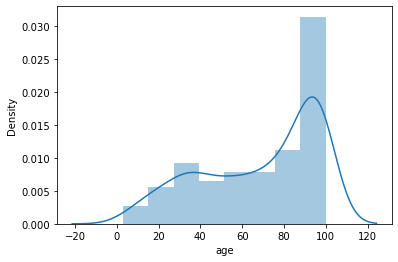

dis skewness =  1.0117805793009007


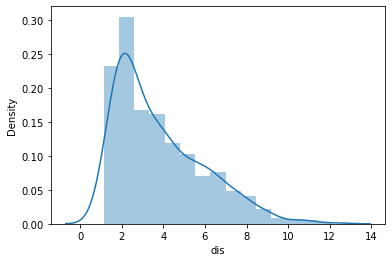

rad skewness =  1.0048146482182057


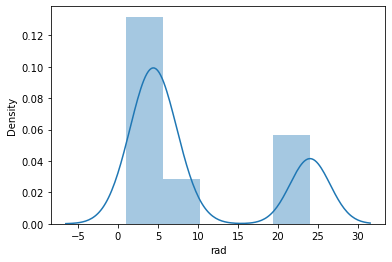

tax skewness =  0.669955941795016


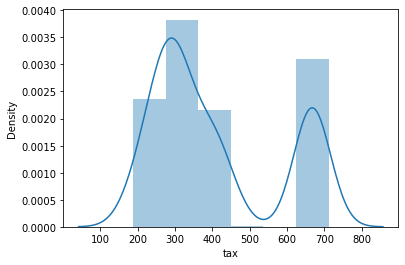

ptratio skewness =  -0.8023249268537809


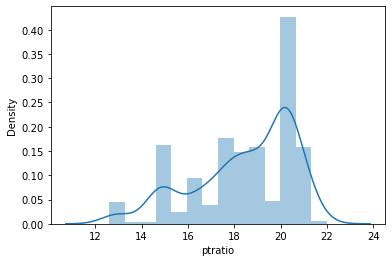

b skewness =  -2.8903737121414492


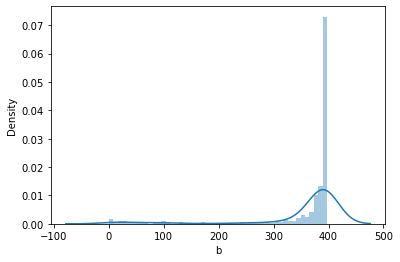

lstat skewness =  0.9064600935915367


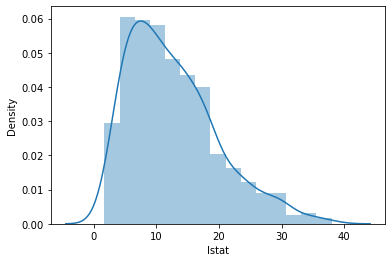

In [15]:
for cols in df_2:
    s = df_2[cols].skew()
    print(cols,"skewness = ",s)
    sns.distplot(df_2[cols])
    plt.show()

In [16]:
boston_house[boston_house["crim"]>=10].value_counts().sum()

54

In [17]:
for col,i in boston_house.items():   # here col = columns, and  = values(index)
    q1 = i.quantile(0.25) # 1st Quantile
    q3 = i.quantile(0.75) # 3rd Quantile 
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    val = i[(i<lb)|(i>ub)]
    perc = val.shape[0] * 100 / boston_house.shape[0] # rows in val & boston_house rows
    print(col,"outliers counts =",val.value_counts().sum(),",outliers = {} %".format(round(perc,2)))

crim outliers counts = 66 ,outliers = 13.04 %
zn outliers counts = 68 ,outliers = 13.44 %
indus outliers counts = 0 ,outliers = 0.0 %
chas outliers counts = 35 ,outliers = 6.92 %
nox outliers counts = 0 ,outliers = 0.0 %
rm outliers counts = 30 ,outliers = 5.93 %
age outliers counts = 0 ,outliers = 0.0 %
dis outliers counts = 5 ,outliers = 0.99 %
rad outliers counts = 0 ,outliers = 0.0 %
tax outliers counts = 0 ,outliers = 0.0 %
ptratio outliers counts = 15 ,outliers = 2.96 %
b outliers counts = 77 ,outliers = 15.22 %
lstat outliers counts = 7 ,outliers = 1.38 %
medv outliers counts = 40 ,outliers = 7.91 %


#### Observation : treating the outlier would lead to loss of Data, so further proceeding with LinearRegression modelling.

### Scaling using StandardScaler :

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
s = StandardScaler()

In [20]:
for col in boston_house:
    boston_house[col] = s.fit_transform(boston_house[[col]])

In [21]:
boston_house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


## model performing :

### 1. separate data into input and output data :

In [22]:
x = boston_house.drop("medv",axis=1)
y = boston_house["medv"]

In [23]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [24]:
y.head()

0    0.159686
1   -0.101524
2    1.324247
3    1.182758
4    1.487503
Name: medv, dtype: float64

### 2. to split data into 30% testing and 70% training data :

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [27]:
def model_perform(model):
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    print("Training score = ",model.score(x_train,y_train))
    print("Testing score  = ",model.score(x_test,y_test))
    print("r2_score performance  = ",r2_score(y_test,y_predict))
    print("Slope  = ",model.coef_)
    print("Intercept = ",model.intercept_)
    print("MAE  = ",mean_absolute_error(y_test,y_predict))
    print("MSE  = ",mean_squared_error(y_test,y_predict))
    print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict)))
    sns.scatterplot(y_test,y_predict)
    plt.show()
    sns.distplot(y_test-y_predict)
    plt.show()
    return model

## 1. Linear Regression :

In [28]:
# to apply LinearRegression :
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
# to create a object of LinearRegression :
lr = LinearRegression()

Training score =  0.7103879080674731
Testing score  =  0.7836295385076291
r2_score performance  =  0.7836295385076291
Slope  =  [-0.09216135  0.15413924  0.04413755  0.06737269 -0.27050794  0.21358753
  0.01094049 -0.34715598  0.29116184 -0.20670653 -0.23668102  0.06402762
 -0.44166972]
Intercept =  0.00618893194731969
MAE  =  0.3640249565552191
MSE  =  0.23491385853033495
RMSE =  0.48467912945611236


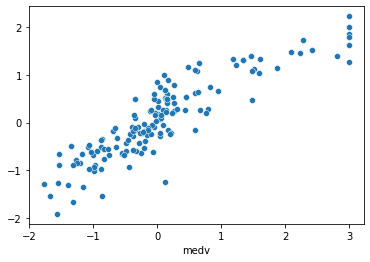

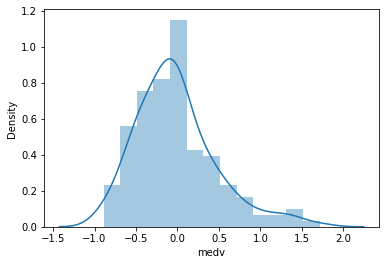

In [30]:
# to train and test model : call function 
lr = model_perform(lr)

#### Observation : model performance 78% from the above LinearRegression modelling, further need to proceed with Checking the Assumption of LinearRegression and then compare

### checking Assumptions :

In [31]:
def assumption(model):
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    model.score(x_train,y_train)
    y_predict=model.score(x_test,y_test)
    residual = y_test-y_predict
    sns.scatterplot(y_predict,residual)
    plt.show()
    sns.distplot(residual)
    plt.show()
    return model

In [32]:
lr = LinearRegression()

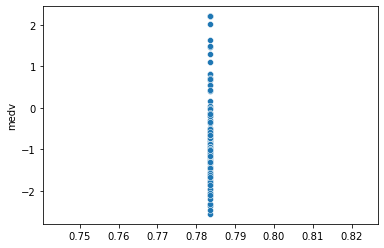

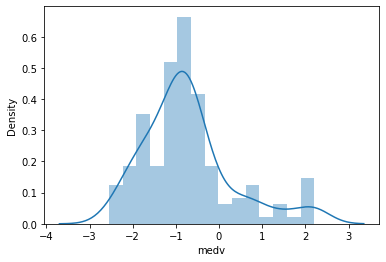

In [33]:
lr = assumption(lr)

<AxesSubplot:>

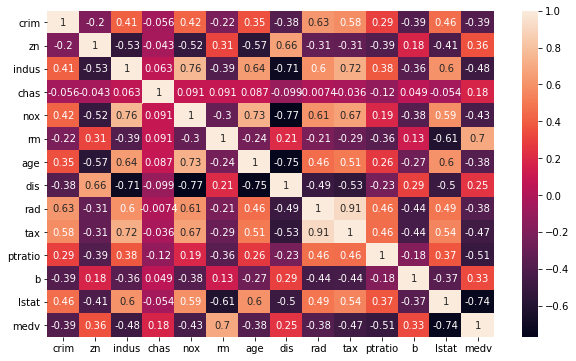

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(boston_house.corr(),annot=True)

#### Observation : from the above method it is observed that, assumption (a) & (b),(c) and (d) are failed, while, so we proceed with applying Polynomial to increase the Degree of the input, and see whether we can gain better accuracy. 

## 2. Polynomial Regression :

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pf = PolynomialFeatures(2)

In [37]:
x = pf.fit_transform(x)
x

array([[ 1.        , -0.41978194,  0.28482986, ...,  0.19452681,
        -0.47437883,  1.15683427],
       [ 1.        , -0.41733926, -0.48772236, ...,  0.19452681,
        -0.21719133,  0.24249653],
       [ 1.        , -0.41734159, -0.48772236, ...,  0.15715436,
        -0.47917217,  1.46102192],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  0.19452681,
        -0.43357505,  0.9663826 ],
       [ 1.        , -0.40776407, -0.48772236, ...,  0.16259032,
        -0.34891116,  0.74874691],
       [ 1.        , -0.41500016, -0.48772236, ...,  0.19452681,
        -0.29508947,  0.44763905]])

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [39]:
# to apply LinearRegression :
lr = LinearRegression()

Training score =  0.9312047633452772
Testing score  =  0.7983436127866246
r2_score performance  =  0.7983436127866246
Slope  =  [-7.77169304e-14  8.25987954e-01  2.79109733e-01  6.04339014e-01
 -1.17700768e+12 -3.05695923e-01  3.76099550e-01 -2.71090508e-01
 -2.93106749e-01  6.78253174e-02 -2.94250488e-01  1.36688232e-01
  2.28969574e-01 -3.49178314e-01  4.89501953e-02  1.21726990e+00
  9.97249603e-01  5.52017212e-01 -2.43721008e-01  2.03102112e-01
 -2.32578278e-01 -9.37862396e-02  6.77706003e-01 -1.91396332e+00
  6.30558014e-01  2.71606445e-03  1.87725067e-01 -3.59497070e-02
 -7.74688721e-02 -8.85581970e-02 -5.22415161e-01  2.91900635e-02
  4.74395752e-02 -1.17462158e-01  7.08999634e-02  2.46879578e-01
  3.33328247e-02  1.26647949e-03 -1.30187988e-01  1.55353546e-01
 -4.92668152e-02  3.01258087e-01  1.25797272e-01  9.72900391e-02
  3.42750549e-01 -1.66313171e-01  1.91238403e-01  8.08258057e-02
  1.00210190e-01 -7.88955688e-02  3.46606962e+11 -1.72348022e-01
 -1.05697632e-01 -3.6468505

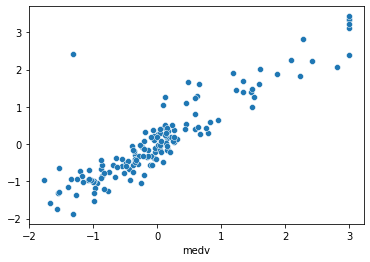

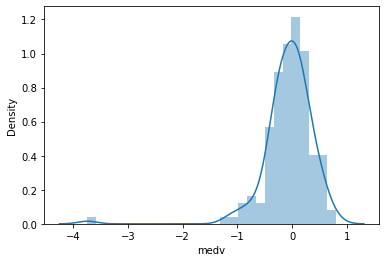

In [40]:
lr = model_perform(lr)

## 3. Feature Selection :

In [41]:
x = boston_house.drop("medv",axis=1)
y = boston_house["medv"]

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [43]:
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [44]:
l1 = LinearRegression()

Training score =  0.7103879080674731
Testing score  =  0.7836295385076291
r2_score performance  =  0.7836295385076291
Slope  =  [-0.09129752  0.15546352  0.04411471  0.07394687 -0.2754014   0.2104717
  0.01098248 -0.35221486  0.29420763 -0.20867398 -0.23463033  0.0633735
 -0.44997024]
Intercept =  -0.021003000995930658
MAE  =  0.36402495655521916
MSE  =  0.23491385853033495
RMSE =  0.48467912945611236


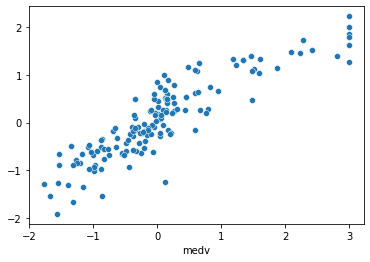

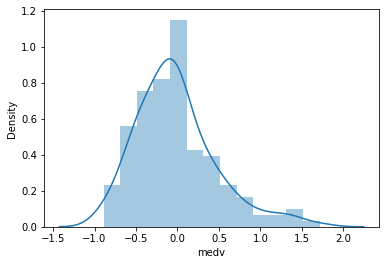

In [45]:
l1 = model_perform(l1)

#### Creating a function model to perform the model training and testing :

In [46]:
def model_perform(model):
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    print("Training score = ",model.score(x_train,y_train))
    print("Testing score  = ",model.score(x_test,y_test))
    print("r2_score performance  = ",r2_score(y_test,y_predict))
    print("MAE  = ",mean_absolute_error(y_test,y_predict))
    print("MSE  = ",mean_squared_error(y_test,y_predict))
    print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_predict)))
    sns.scatterplot(y_test,y_predict)
    plt.show()
    residual = y_test - y_predict
    sns.distplot(residual)
    plt.show()
    return model

### 1. RandomForestRegressor :

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rfr = RandomForestRegressor(n_estimators=50,random_state=1,max_features=13)

Training score =  0.9799808444530419
Testing score  =  0.9013922217243228
r2_score performance  =  0.9013922217243228
MAE  =  0.25202033955471825
MSE  =  0.10705866926599789
RMSE =  0.3271982109761572


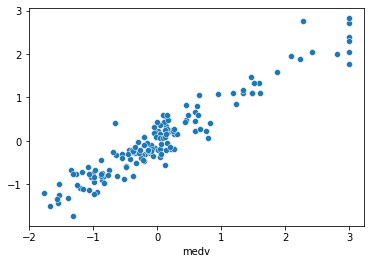

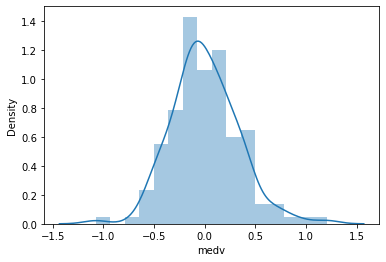

In [49]:
rfr = model_perform(rfr)

#### Observation : From above training score and testing score, and the residual plot, the predicted output is closer to actual output as we can see in graph.

In [50]:
dic = {"input":x.columns,"info_gained":rfr.feature_importances_}
dic = pd.DataFrame(dic)
dic.sort_values("info_gained",ascending=False)

,input,info_gained
12,lstat,0.587196
5,rm,0.203751
7,dis,0.055248
0,crim,0.037132
4,nox,0.027506
10,ptratio,0.024230
6,age,0.023283
11,b,0.013751
9,tax,0.011269
2,indus,0.007554


### 2. XGBRgeressor :

In [51]:
from xgboost import XGBRegressor

In [52]:
xgb = XGBRegressor(random_state=1)

Training score =  0.9999986191730262
Testing score  =  0.8900906778408197
r2_score performance  =  0.8900906778408197
MAE  =  0.25538267460125696
MSE  =  0.11932877888591581
RMSE =  0.3454399787024018


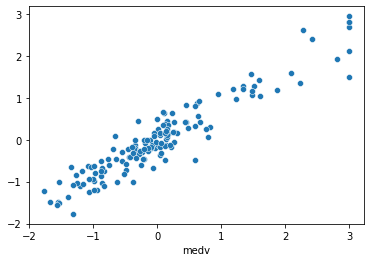

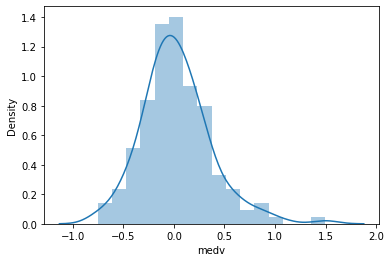

In [53]:
xgb = model_perform(xgb)

#### Observation : From above training score and testing score, and the residual plot, the predicted output is closer to actual output as we can see in graph.

In [54]:
dic = {"input":x.columns,"info_gained":xgb.feature_importances_}
dic = pd.DataFrame(dic)
dic.sort_values("info_gained",ascending=False)

,input,info_gained
12,lstat,0.591479
5,rm,0.134768
7,dis,0.068260
4,nox,0.043500
10,ptratio,0.041747
9,tax,0.034438
6,age,0.017516
3,chas,0.016393
0,crim,0.015434
8,rad,0.012965


### Cross-Validation to see which model performs better :

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
rfr_cross = cross_val_score(rfr,x,y,cv=4)

In [57]:
rfr_cross

array([0.73890265, 0.82858684, 0.57405079, 0.14326343])

In [58]:
np.mean(rfr_cross)

0.5712009266555862

In [59]:
xgb_cross = cross_val_score(xgb,x,y,cv=4)

In [60]:
xgb_cross

array([ 0.68350816,  0.79664343,  0.57674243, -0.05943668])

In [61]:
np.mean(xgb_cross)

0.4993643328473354

### Observation : 

From above method of using Ensembling technique, it is observed that information 
gained through using RandomForestRegressor and XGBRegressor is maximum to "lstat" and "rm".
While the Best model to use for predicting is **RandomForestRegressor** as the cross_val_score is greater for RandomForestRegressor than that fo XGBRegressor.

## Conclusion :

From the Model performing and the information gained for the features to predict the House sale price, it is conlcuded only features input "lstat" and "rm" is sufficient to predict the house price in the Boston_Housing Dataset. **XGBRegressor** and **RandomForestRegressor** is the Best model to predict the house sale price.